# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=1, color='green')
    vis.show()

In [3]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
#     vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=1, color=['green'])
    vis.add_point(points_mid, s=1, color=['purple'])
    vis.add_point(points_right, s=1, color=['orange'])
    vis.show()

In [4]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

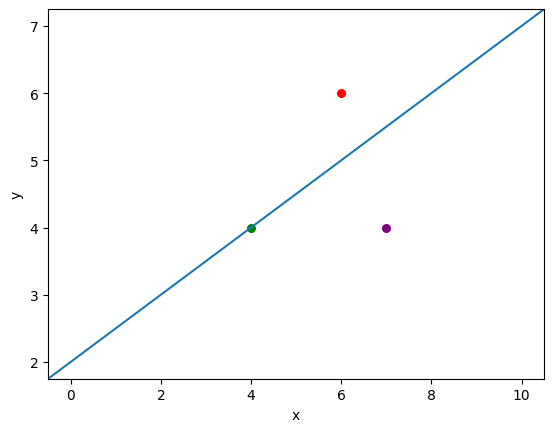

In [5]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [6]:
def generate_uniform_points(left, right, n = 10 ** 5):
    import random
    
    points=[]
    for i in range(n):
        points.append((random.uniform(left,right),random.uniform(left,right)))
    
    return points
    
    raise Exception("Unimplemented")

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [7]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

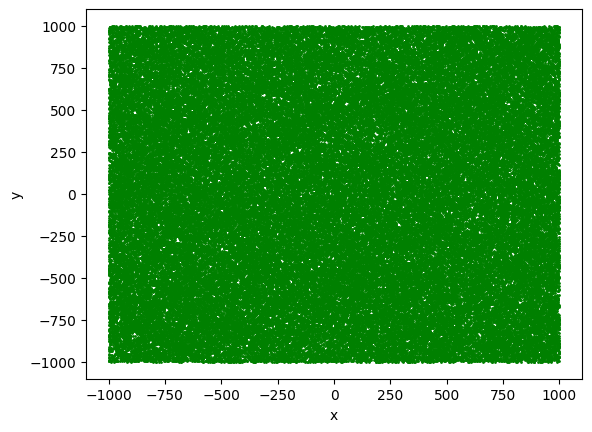

In [8]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [9]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

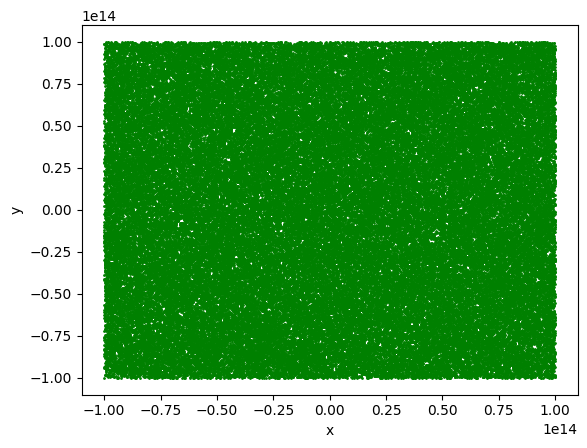

In [10]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [11]:
def generate_circle_points(O, R, n = 1000):
    import random
    points=[]
    xk,yk=O
    znak=1
    for i in range(n):
        alpha = 2 * np.pi * random.uniform(0, 1)
        x = R * np.cos(alpha) + xk
        y = R * np.sin(alpha) + yk
        points.append((x,y))
        
    return points
    
    raise Exception("Unimplemented")

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [12]:
points_c = generate_circle_points((0, 0), 1000)

Zwizualizuj wygenerowane punkty.

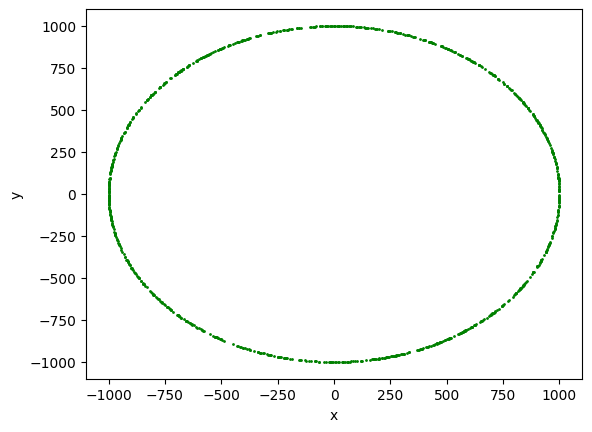

In [13]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [14]:
def generate_collinear_points(a, b, n=1000):
    import random
    ax,ay=a
    bx,by=b
    const=(ay+by-ax-bx)/2
    points=[]
    for i in range(n):
        val=random.uniform(-1000,1000)
        hight=val*(by-ay)/(bx-ax)+ const
        points.append((val,hight))
    return points
    
    raise Exception("Unimplemented")

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [15]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1))

Zwizualizuj wygenerowane punkty.

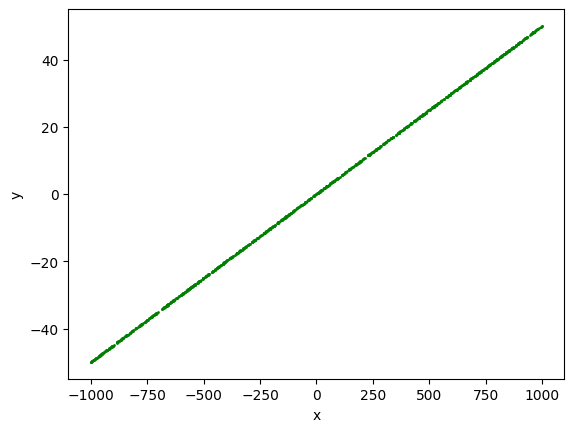

In [16]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [17]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.359s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [43]:
def mat_det_3x3(a, b, c):
    
    ax,ay=a
    bx,by=b
    cx,cy=c
    return ax*by+ay*cx+bx*cy-cx*by-cy*ax-bx*ay

    raise Exception("Unimplemented")

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [44]:
def mat_det_3x3_lib(a, b, c):
    ax,ay=a
    bx,by=b
    cx,cy=c
    n_array=[[ax,ay,1],[bx,by,1],[cx,cy,1]]
    return np.linalg.det(n_array)

    raise Exception("Unimplemented")

Uzupełnij funkcje ```mat_det_2x2```

In [45]:
def mat_det_2x2(a, b, c):
    ax,ay=a
    bx,by=b
    cx,cy=c
    return (ax-cx)*(by-cy)-(bx-cx)*(ay-cy)
    
    raise Exception("Unimplemented")

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [46]:
def mat_det_2x2_lib(a, b, c):
    ax,ay=a
    bx,by=b
    cx,cy=c
    n_array=[[ax-cx,ay-cy],[bx-cx,by-cy]]
    return np.linalg.det(n_array)
    
    raise Exception("Unimplemented")

Przetestujmy napisane powyżej funkcje.

In [47]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [48]:
def categorize_points(points, a, b, mat_det_func, eps):
    left=[]
    right=[]
    on=[]
    for c in points:
        ans = mat_det_func(a,b,c)
#         uzyte przy testach dokladnosci floata 
#         print(ans)
        if ans>eps:
            left.append(c)
        elif ans<-eps:
            right.append(c)
        else:
            on.append(c)
            
    print(mat_det_func, eps, len(left), len(on), len(right))
        
    return left, on, right

    raise Exception("Unimplemented")

In [49]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [50]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -12)

1757.729914713651
-2021.7984830540954
1359.1246782858216
-1846.4550464104686
-694.0767770675011
-1758.162118704815
829.2065410152427
-2043.2338805117179
-725.9269696331467
869.5424884711683
-1323.9616574766696
-1959.5642179213064
755.1779482575657
732.7027479214885
-756.7823020770447
1089.9540399187244
-302.0389400447748
-1961.574055991834
1187.9488492124
1489.6762491436675
-337.2615276966171
-1393.0936373759469
162.38743856362998
-435.1860376560162
1060.3160292227985
-357.52160713293415
-1120.2334718870115
-785.5340263749531
1418.6983667075983
218.67736104039068
807.7843527926598
932.3977468937519
-1039.1412413362414
-1425.587536196981
-1747.296461537131
-923.8294006054057
445.90971580604673
1836.2213307313505
1625.5197394400311
822.5792249134684
-575.9279509989719
-468.70837036619196
790.7673883769894
-1772.0303094729315
-1453.2012423992855
-104.90571357364752
-130.76061962959648
-764.9925106364244
-1833.713534851966
-1936.8264971685712
829.1431312943296
-1086.8065738426812
-466.2404

-791.1908057019464
392.22936248534825
1280.4725639426033
1350.2383161750622
-1176.5633181110516
1558.50419855761
-352.91901691030944
-1319.7206916338873
-996.7916572535178
1505.7587573784404
1830.2288357291836
1071.3439609152847
-255.5245304190612
876.459672291734
-1353.5321032304782
-1885.925987454364
1861.393343948992
1982.9653971942025
-506.9067480612939
-1266.7517298093007
782.3307713365939
1961.4840115738334
363.9380828054964
1273.7467184574925
-1021.8900650534488
-418.7692234382848
1004.0650055157603
1110.9867181204027
1028.303398286458
381.98958237160696
-1596.6215974210645
683.0686036668194
-1625.2492180416593
-1178.9415817804402
903.9258535557892
-1157.3166924699035
-1698.7338584815152
-197.73990860290724
1175.811803991819
645.5132748025499
53.43035402755413
1289.8120869141185
-1411.1814100875054
797.3250620345862
1708.8061448523076
-1876.0181122480426
-567.7567785517749
1944.670382007811
574.077086427249
483.57977822936664
488.28245861368487
769.8318836904073
-628.76554274637

-1568.2030430099694
1684.8618419762352
1229.1787931624567
1307.9689808200346
566.6654069919605
-1139.628377901914
-1430.6938526177546
1099.3954382961965
676.1430465732992
1434.2684656924685
-870.0243894333835
322.27390652698705
1340.4008218427189
1325.3857163413777
-765.9016251687863
-602.9716671817005
539.2481458901893
-1.99533261605211
-1969.1079939175397
-1066.4311991783761
1852.765494181811
328.51915614385507
-1143.94995809783
30.39462514976185
-669.5851095959952
-1190.200543590996
317.27267162376666
770.9030318329169
-128.23739653130906
-192.6947333362623
1935.9570841158275
-786.711830400367
-1680.10316770582
526.8469702001166
-1249.0074786234181
-636.1126479174291
-12.52052150281088
1104.4742331517045
-18.075475696779904
479.7575794834702
-302.3786331055162
1109.832172313938
565.61500058214
-391.76375557883875
-1036.863364280085
275.9111298726857
-1997.0290962400613
1513.1398000019835
-1753.4201276752865
-1903.377106518048
-1453.2120340674883
-467.32466519920126
1721.014575110166

-1268.7159868975286
-2020.4215755488258
1226.895877377152
-1593.7816654702474
-1434.6716155710164
-155.14094975811895
1440.1815499044023
-1611.4500231498678
-1959.819155383564
-1513.4002905706875
125.57449099695077
870.2334261008509
-1063.3161455740337
-1938.4383102132706
1350.125740803982
-195.04361129482277
1297.9132423472038
-1241.3674504536903
-1259.7483527103323
-1367.543992624618
1390.6922592498595
319.7215990198912
336.89614290012105
189.61166415311163
1063.0968367035966
133.939933166017
1944.3131602247013
1767.7298785434105
-93.86383283205214
1741.9603987002192
-520.7821773217584
15.386673221870296
-759.0354286741931
-1814.293588430155
1210.3427208607318
-1002.6525801595562
147.86438944256224
-1603.0442087869742
703.8319710562355
1869.4044871911174
-1293.5437384718098
61.43204136245822
849.4694915424916
-1687.6791330293636
-926.4533607225312
1269.5686800723633
-1789.0554082062445
1984.7921767031075
-872.89503973705
-858.4174553810735
-931.6347043287486
-673.081327234453
-1921.1

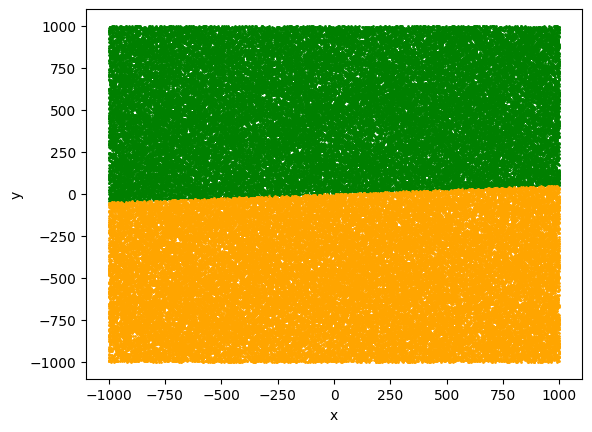

In [51]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [52]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, 0)

110014495858826.34
-62849167359458.375
-41887596788144.79
13843298882500.527
76863249262582.62
-565539394219.3214
15259336679664.123
-143143109190541.66
-89556643717708.95
75488429600634.3
18106951652643.95
74117085139041.75
143446514777347.9
-145318381206097.16
-147864316772469.44
-26624946246903.03
-200320556811127.03
-122717433245432.2
117150189505208.5
-67240783665961.32
96750112077114.9
187944786516480.84
175184220453421.88
14715008052465.49
-55173959831537.695
83604073780172.89
-130142732735682.95
-155928638992442.4
-109760724247954.67
-172064817400891.44
154585987516160.2
-177485846177852.3
-42773587542617.21
124023230060129.92
-155889871632351.16
161639512526862.94
193647897957362.1
-190732261367471.78
142518198631503.1
129310620507867.69
-31321152639804.25
-76035099724841.89
-36353958976327.07
131550048556446.67
42008722676606.984
-169994621942170.56
72208848415649.28
-103203259908085.45
-103411900611655.34
-132936561306948.73
-91840474387737.78
-18478865537681.723
12945738703

55299454684970.31
-89019919302143.23
118538582021680.55
6753518584664.262
119859370786167.94
-143950807184911.62
-162051113905678.9
-70697608447993.77
85692922131203.08
183686930435340.94
-175818198541178.2
170881414507271.53
171482177513625.3
32447367073317.71
157676232706901.75
-154704884833561.78
120927666912617.92
-120858824192399.11
6215209773753.64
118078540836352.75
-105814120628310.56
1646544704225.0803
41284299831215.71
97733381631854.12
157609937143160.6
-70001817328050.445
-206864680040856.44
33242401176849.914
266798145446.71948
54587197499962.76
-44050435655744.41
90151489468797.78
-7621850099924.791
70434863941356.64
128838774668779.3
89207573061955.03
72419753161110.48
96422895741868.81
-4648509006970.819
-89928200191073.45
-81788865493114.33
182670854163190.0
80271919298744.56
124969139678709.31
121338236238340.98
-12138378053900.709
-152437641037504.22
14224868501667.666
172247416699269.84
73675098831572.45
-3720169368930.1465
42341329036016.305
-52078454589949.31
8213

-175862467475504.4
182635831685114.97
-122682164384099.25
-184759884814652.53
-96364590948267.72
20285766778594.934
-60767700334817.4
164307998486914.4
-5887968198992.528
-86230107535995.12
-174893890508626.3
-155798047640093.97
-107368173538090.11
50906528968631.72
19924100788595.83
-95963930527167.62
144879750591787.34
-41373132639193.0
84122313090496.72
44580417560967.99
-36179981732473.26
9729195139055.076
138479947605105.05
191946021871224.72
-3411948842614.844
145487296545934.94
-129347708037404.48
-17224460653838.348
-141502492611241.6
-77217000680015.73
108753553105434.05
-176099033950510.5
-134720368793703.61
-178810359297333.0
160609493900773.94
-145695992662424.2
30640244232237.15
-190371247751998.2
194249325096856.56
132338654410372.2
6482902286099.336
-58927735803569.8
-157461569162830.2
-72653150348937.03
113717812445394.94
-184800961288181.22
-183982795196741.9
133082323034236.14
-76441133743573.67
95538344762870.1
-64859703947109.89
185819161218124.88
-32947044395333.77

182468753193217.16
160881814874895.25
191712329134200.53
-17054083855465.521
16012847116409.53
-173643415704973.6
-180689966493623.34
-114156535706448.67
90873114821991.05
22277595259683.285
111104941475344.78
-162116421181931.12
130366463776861.88
151759421346320.0
138324915178174.72
-182655156874154.47
-86805354364703.9
-69231841487242.45
-139594835428641.31
-40089499397583.69
74356241437077.2
-100698066829558.7
109160761844003.97
-145936751941815.66
-149446150370730.53
166494334711082.22
20681744579790.86
118562014497255.67
-95932761855795.75
113593815388222.0
-112039063704673.72
-11332838690238.953
-41924227497.217735
-197988237174927.22
-5359701654223.472
38296328139811.73
-80951823011356.28
-78544399578638.12
-26108711567557.594
75895260246002.88
115800630304139.02
41927579250690.31
203652703133268.62
-89613037805606.27
-58652677922563.34
155965842812110.78
-123694040096049.75
-71186681976117.9
46737402807945.92
-134380552655386.38
127397135676949.98
-134090667275295.39
-33854114

132762907528366.48
1156306187002.6057
144474767848332.53
-84123442318069.92
-140088299160349.48
130643248572042.83
118980466434694.25
-147125848846897.62
59798153724295.63
39002481978522.586
177675622083258.56
55018359316183.86
-35242906921535.16
-188947492616403.5
101406329131137.19
-122653647824545.64
-165110027663355.12
-194449220063496.97
-154145487577338.53
-154436081778686.34
109594599295535.73
34873554777145.188
-190338661876740.34
-45538478921584.875
14943179875854.307
44670164147770.32
-139816906930835.9
-105892003767917.69
-157720263865472.4
18835079916378.375
-166831506281623.06
155897489206103.88
-2437636641005.826
-175746286150851.6
-170511318055725.22
-191850648772169.28
3209246138713.232
180324047217364.44
-146427920926321.75
-69119464227583.09
-157794636695180.84
82041555063987.45
-48090120442473.83
-197063210903901.22
-185228925199729.5
-191516649612538.56
74958028385758.55
-72690709100401.4
-84147144235434.22
156853447055186.88
-17916484644466.49
194482247652317.22
18

147786582687295.97
-8584330922927.892
82814530587529.92
178295923479411.97
64917593174136.375
81228506656646.02
-176697300045138.12
95431392635606.27
-190749039463426.44
134010081924717.5
32650345396871.633
8733078392668.641
86532572996396.31
-113931076555393.7
-149289873986457.8
12382718020801.658
147854985576628.8
-16421058555014.469
-25231482442532.926
-11978357068440.684
22513257088515.312
93752141897036.92
190210259522836.1
100409959255174.44
85881542404566.27
84254551292345.66
-172713934826545.53
187256169171724.97
-121705424634548.6
196718215269519.9
-85771010910472.31
-122769301638751.39
36863539389827.055
-186981864148439.78
-83426797021920.05
99853170491887.4
-14583581366642.758
131942012660701.69
-34491510774515.473
118820683203124.75
99423582340247.02
161902931326773.1
159023699636640.47
69347569819769.68
32038253538719.387
-134949010641459.14
62023778011532.95
195043484424257.72
-148094395827433.56
-150763368761031.56
42415456846177.97
-106469786045303.97
-103124475414641.

-105675417139039.75
-34826001046505.582
-48973240415255.16
151020483156716.1
-188658585103201.12
134979849903190.52
-25324403604081.984
-96847550966645.17
49032472146542.21
-35947470227151.75
169072631437361.3
58080565270476.93
171573342622017.1
4261857745217.759
76733816210174.0
-92910124757679.45
-57922454305464.05
-49332790220943.05
-157349450780300.62
7175236408280.733
86245430540689.69
-7681458289793.784
-24511238305133.465
-41599455830114.38
115428704241442.2
-135234491492036.27
-201339710673972.8
-69649711475478.52
-91004364571279.42
27956398248922.8
-28947551824640.52
-50748447345970.23
-8013454167522.202
-96603907729492.48
-53794081605151.28
155682818247817.44
-147183232495240.34
-25051542019954.01
-175320139662420.7
44973148950119.46
49116160867585.055
-59070423876451.39
-70984452811505.83
-100989491676092.78
-144986161743337.06
-166304342746791.0
-92621538848171.73
-123065203258679.81
-205077953874240.1
180889548479062.22
119083802980148.6
-140828441166943.47
189614973266117

25808795138540.51
170819641107860.88
30347677839840.414
99272235982270.48
74534297924540.69
88741654161236.58
-147046779641279.16
-13114878387729.654
92342734918273.52
155724564407545.84
-19190256742910.56
-168051281689644.3
-81237009887660.78
-164551078782465.5
-153301865066308.25
77271764318600.34
-80591462088569.3
61467007266261.77
-119456161960551.58
-198175697835672.12
192959285810241.78
123021434082825.77
-3704157835548.8677
188779903141607.25
-64555294646985.09
-116052448391233.66
-152691768515249.6
-183780353847697.6
41734524838016.164
19949120979848.562
-169495096312212.56
8264684384515.774
5764297872144.141
46229451859443.484
-15298220664723.506
-29877896654981.7
-118884263454845.61
-199747772729825.56
-39752091233099.45
-184181536798731.94
-43914264808389.94
80829350251914.3
-95525223740876.14
152900440870173.12
76047401482955.9
-175521243239459.0
156437458723470.34
-158609281748879.9
-165141822568119.34
106585162300722.22
-186917589305210.38
104356685742862.75
8226691169401

-72065722020153.78
79611714395854.52
101489723469656.0
203233397673418.62
-52725798083642.64
39927325531472.68
83652370211819.55
128566697986310.69
-24527883793658.53
-67425871316280.04
-51690110909734.2
199465161262458.1
133843123155555.88
5609331927776.171
-192293906702842.38
-135819462297968.7
-80298044382364.95
-30862467302258.297
-165736132963663.25
-142728150529213.28
79387081203992.88
-179405307567141.84
-118287928242186.72
2405001557563.1772
104279665234726.06
170807887256850.22
127694463173450.17
58394241518400.88
90370621944987.45
156981898738234.06
-146966722156170.38
-31957985820672.062
80165532254629.8
-21011866951612.32
162588254931846.44
-162777679325456.75
-104646017936333.77
65368957479242.32
154709288794417.78
-182345532718389.7
-128524872652058.92
170030725915131.84
14761134634606.664
-162923251220279.75
159914876408191.88
-39698885915229.44
178243543812522.38
25092168811191.465
-71054993273637.03
-171541833402673.1
154759665721178.56
175503646161416.06
-301313954140

-58641164918448.37
136292568625200.6
44822277281461.39
64558386518246.36
-31913718324761.38
69596422079196.3
151224667597733.1
46984548747636.87
132127612519937.23
-1133610077033.4478
88496925483014.92
-178492129725430.12
184136144460731.97
-68411854554987.77
-173117256974681.28
183230958824934.34
-162639352558534.56
110432642756135.38
-82010150784202.5
109385725741697.31
-64789822375635.9
126525015806814.58
169853097170526.03
33709452908790.926
97884225643758.08
-190314495590596.1
-193279610521638.9
-183480396128219.1
103340116836988.83
167723548302550.47
99168588289976.17
-131372999944283.88
-140937293998566.75
-59262914959441.53
-165819407653961.56
95432660757463.9
-56516784097431.65
49502165124945.664
187149755445437.1
-131351683090058.45
-20833040496798.0
-14031982556521.5
-119258186229622.1
-10473128762617.66
95440481578100.12
116234529461414.95
-48119822532722.305
-122566958688321.31
119476255035468.62
-197276156394859.5
170092466595873.2
-19852473271822.16
76150935718813.31
-71

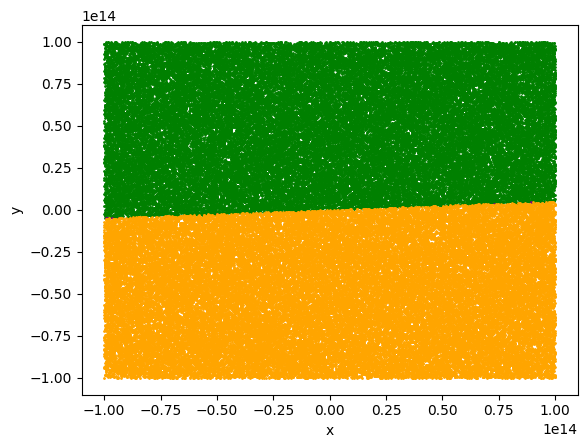

In [53]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [54]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)

-945.7459468033048
1009.4366504222271
1977.2807825531636
1258.891764695407
-123.63721257989891
406.6987973419891
838.00806230749
-389.61923871398903
-1943.3509286709595
1839.5323121038964
-320.18520713510225
1234.6257255880046
1534.4532815528219
-1117.160595415684
255.88336350902682
1966.9186217359675
1466.050944887218
1546.1472971521434
1710.0990829995717
1664.253312668763
1644.0257961438037
1650.0688706442597
-1168.6600331316586
-1924.9397336427355
419.6459824217309
-1250.9745990978554
-1079.7046592845
-474.3836090407567
-594.6021769144572
-1307.0252313223318
-175.10851323773386
-1306.1950191573706
1962.4774144224357
-1979.5904393022647
-496.28046380955493
1500.9336057997425
-1811.0718775942805
-1612.4482019831194
-1927.9964371918177
1546.530643159058
-597.6504272658785
1082.5866238464369
986.0015551466495
-688.9225132318679
1521.0985374301672
-1208.5093563502887
944.7061755359173
208.3724860123766
-136.03751203436696
1530.9955358113511
-815.1406877133413
1706.4391556528863
-725.1755

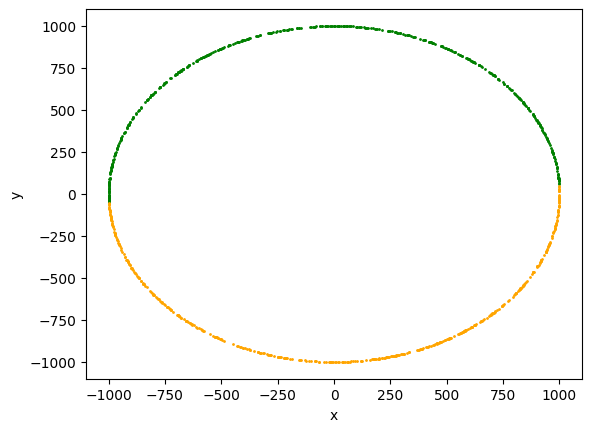

In [55]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [56]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)

0.0
0.0
0.0
0.0
7.0215569298316186e-12
0.0
4.1824068580231654e-13
0.0
-3.1720474636139844e-14
0.0
0.0
0.0
0.0
0.0
2.0104734819594433e-12
0.0
0.0
0.0
0.0
2.019712995293415e-12
0.0
0.0
1.7932962655797123e-12
-2.658626376907338e-14
-2.12808099466803e-12
6.892573364676649e-12
7.105366246926879e-12
-6.79991562577555e-12
0.0
0.0
2.928235725530645e-14
0.0
0.0
0.0
0.0
1.4061866348302412e-12
-6.8272025794281495e-12
-6.843407471787071e-12
0.0
-5.6989694691812715e-12
1.2501027319704901e-12
0.0
0.0
-3.366252001284312e-13
0.0
0.0
0.0
4.8683474042280594e-12
0.0
0.0
-1.3500697343277775e-12
-1.3885745140203057e-12
-4.840583602896812e-13
0.0
0.0
0.0
-1.1832755725056896e-12
0.0
-2.1002694545080107e-12
0.0
0.0
0.0
0.0
4.1289610841899006e-13
0.0
0.0
-7.620165933032434e-14
0.0
0.0
-5.263308033160717e-13
1.1834448733279819e-13
0.0
0.0
0.0
-4.4519659584272975e-13
0.0
0.0
0.0
0.0
0.0
-6.172936236403451e-12
0.0
-5.911181257408241e-12
0.0
0.0
0.0
1.8367328469168636e-12
0.0
0.0
0.0
0.0
2.1266317868656373e-12
0.0

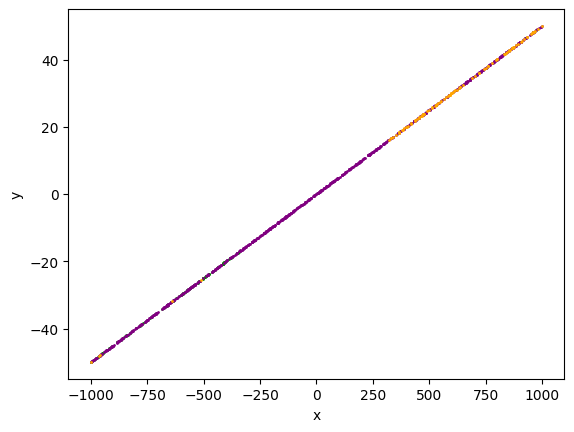

In [57]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [33]:
points_a_float32 = np.float32(points_a)
points_b_float32 = np.float32(points_b)
points_c_float32 = np.float32(points_c)
points_d_float32 = np.float32(points_d)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.


<function mat_det_2x2 at 0x000001AD80CA5550> 0 153 702 145
<function mat_det_2x2 at 0x000001AD80CA5550> 1e-14 147 712 141
<function mat_det_2x2 at 0x000001AD80CA5550> 1e-12 95 831 74
<function mat_det_2x2 at 0x000001AD80CA5550> 1e-10 0 1000 0
<function mat_det_2x2 at 0x000001AD80CA5550> 1e-08 0 1000 0
<function mat_det_3x3 at 0x000001AD80C6AA60> 0 190 423 387
<function mat_det_3x3 at 0x000001AD80C6AA60> 1e-14 0 1000 0
<function mat_det_3x3 at 0x000001AD80C6AA60> 1e-12 0 1000 0
<function mat_det_3x3 at 0x000001AD80C6AA60> 1e-10 0 1000 0
<function mat_det_3x3 at 0x000001AD80C6AA60> 1e-08 0 1000 0
<function mat_det_2x2_lib at 0x000001AD80CA5700> 0 156 690 154
<function mat_det_2x2_lib at 0x000001AD80CA5700> 1e-14 145 709 146
<function mat_det_2x2_lib at 0x000001AD80CA5700> 1e-12 117 776 107
<function mat_det_2x2_lib at 0x000001AD80CA5700> 1e-10 0 1000 0
<function mat_det_2x2_lib at 0x000001AD80CA5700> 1e-08 0 1000 0
<function mat_det_3x3_lib at 0x000001AD80CA55E0> 0 368 314 318
<function 

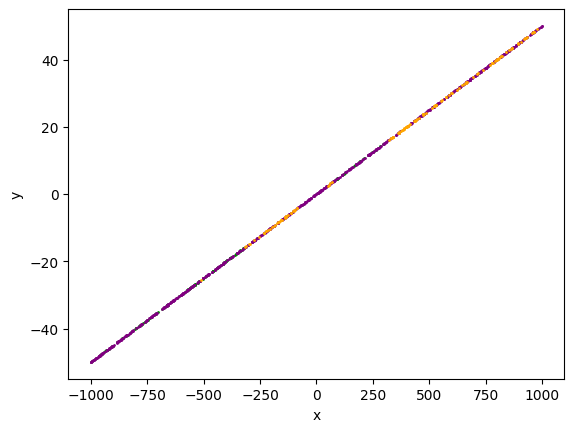

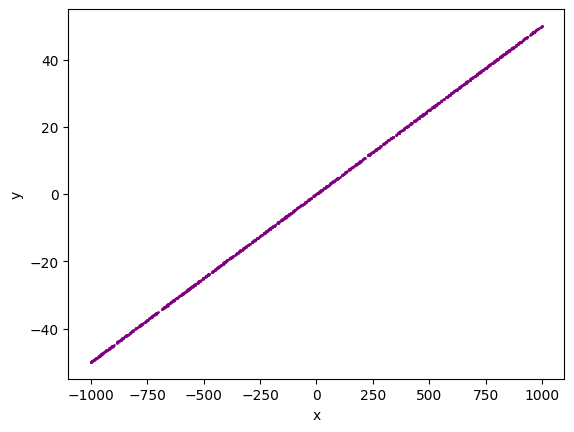

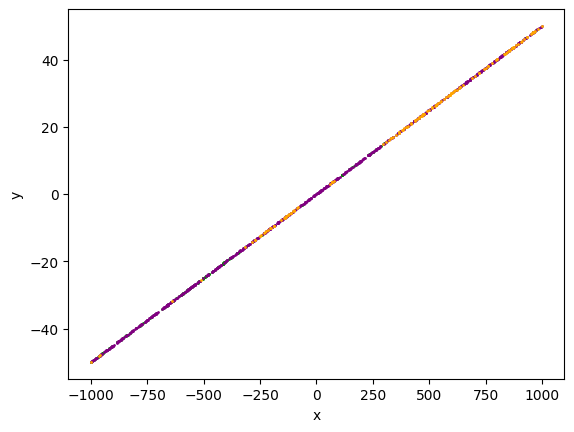

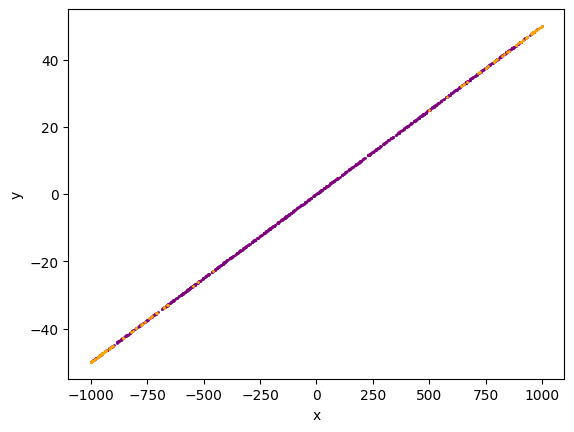

In [34]:
epsilons=[0, 10 ** -14,10 ** -12, 10 ** -10, 10 ** -8]
mat=[mat_det_2x2,mat_det_3x3,mat_det_2x2_lib,mat_det_3x3_lib]
for m in mat:
    for e in epsilons:
        classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_d, a, b, m, e)
        if e ==10 ** -14:
            draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)


<function mat_det_2x2 at 0x000001AD80CA5550> 1e-14 50010 10 49980
<function mat_det_2x2_lib at 0x000001AD80CA5700> 1e-14 50012 9 49979
n1 [(-96590174993860.44, -4798807478040.516), (-72143886362870.17, -3610107143375.203), (-85860817914301.1, -4314512652209.7656), (-50120646105809.75, -2508831096349.8125), (89308776668204.31, 4430752764121.609), (66571599145875.06, 3338992260616.672), (81568747112724.19, 4093836110256.75), (-99086674366205.27, -4945449405549.5), (-98952217960832.1, -4926072102969.719), (-93039428839012.22, -4635699282124.969)]
n2 [(-96590174993860.44, -4798807478040.516), (-72143886362870.17, -3610107143375.203), (-50120646105809.75, -2508831096349.8125), (89308776668204.31, 4430752764121.609), (72809917873987.44, 3637887966003.3438), (-93589701686034.81, -4684725323596.25), (-99086674366205.27, -4945449405549.5), (-98952217960832.1, -4926072102969.719), (-93039428839012.22, -4635699282124.969)]
n3 [(-85860817914301.1, -4314512652209.7656), (81568747112724.19, 40938361

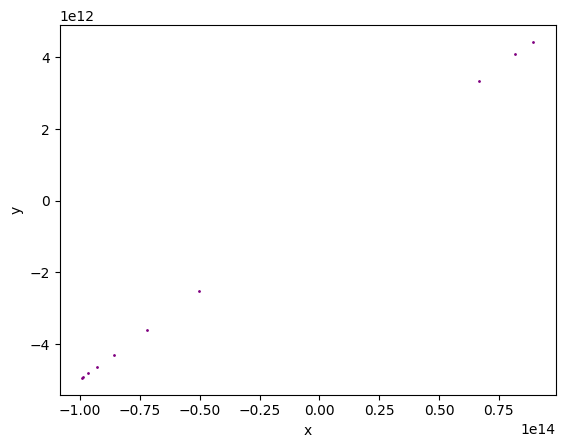

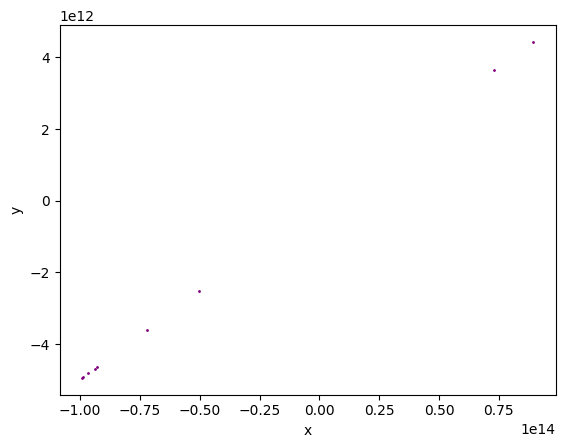

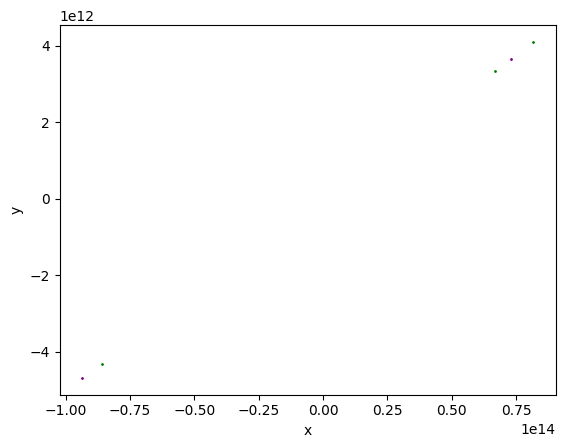

In [35]:
l1,n1,r1=categorize_points(points_b, a, b, mat_det_2x2, 10 ** -14)
l2,n2,r2=categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -14)
those_on_first=list(set(n1)-set(n2))
those_on_second=list(set(n2)-set(n1))
print("n1", n1)
print("n2", n2)
print("n3", those_on_first)
print("n4", those_on_second)
draw_line([], n1, [])
draw_line([], n2, [])
draw_line(those_on_first, those_on_second, [])

In [36]:
# porównanie czasu
import time
mat=[mat_det_2x2,mat_det_3x3,mat_det_2x2_lib,mat_det_3x3_lib]
for m in mat:
    start=time.time()
    classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_b, a, b, m, 10**-14)
    end= time.time()
    print(m, end-start)



<function mat_det_2x2 at 0x000001AD80CA5550> 1e-14 50010 10 49980
<function mat_det_2x2 at 0x000001AD80CA5550> 0.1095585823059082
<function mat_det_3x3 at 0x000001AD80C6AA60> 1e-14 50016 0 49984
<function mat_det_3x3 at 0x000001AD80C6AA60> 0.12057757377624512
<function mat_det_2x2_lib at 0x000001AD80CA5700> 1e-14 50012 9 49979
<function mat_det_2x2_lib at 0x000001AD80CA5700> 1.4500062465667725
<function mat_det_3x3_lib at 0x000001AD80CA55E0> 1e-14 50016 0 49984
<function mat_det_3x3_lib at 0x000001AD80CA55E0> 1.5806264877319336


<function mat_det_3x3 at 0x000001AD80C6AA60> 1e-14 0 1000 0


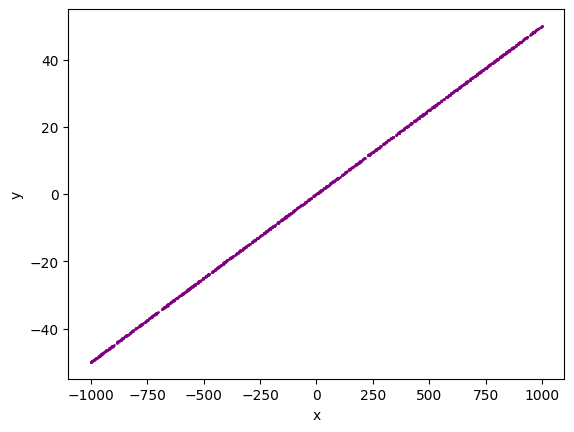

In [37]:

classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_d, a, b, mat_det_3x3, 10**-14)
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)
        

<function mat_det_3x3 at 0x000001AD80C6AA60> 1e-14 419 164 417


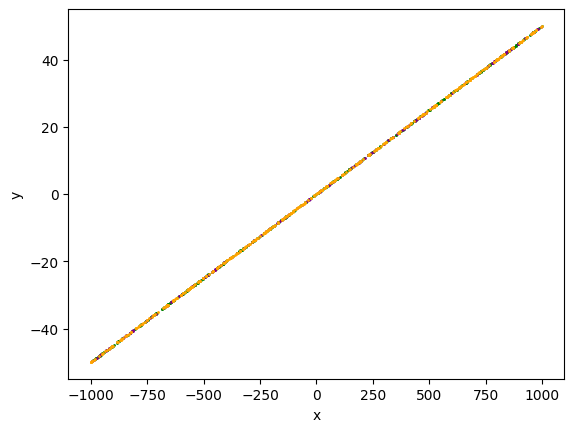

In [38]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_d_float32, a, b, mat_det_3x3, 10**-14)
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [40]:
# Test sprawdzający, czy python automatycznie będzie traktował nowe zmienne jako floata 32,
# jeżeli dane, które otrzymał do obliczenia nowej zmiennej były typu float 32, czy jednak zrzutuje to na floata64.
# Nie zrzutował i został typ float32
a=0.1
b=0.03
c=a/b
print(c)
a=np.float32(a)
b=np.float32(b)
d=a/b
print(d)

3.3333333333333335
3.3333335


In [61]:
#  Ten sam test tylko sprawdzający ilość miejsc po przecinku dla wszystkich wyznaczników wyliczanych.
# Na czas tego testu funkcja categorize_points zwracała wartość wyliczanego wyznacznika dla każdego
# punktu i sprawdzałem liczbę miejsc po przecinku.
# Tutaj jednak funkcja rzutowała float32 na float64 przy wyliczaniu wyznancznika macierzy,
# więc zmianiały się tylko dane wejściowe
categorize_points(points_c, a, b, mat_det_3x3, 10**-14)
print("mniejsza dokladnosc")
categorize_points(points_c_float32, a, b, mat_det_3x3, 10**-14)


-945.7459468032589
1009.4366504222784
1977.2807825531454
1258.8917646953678
-123.63721257990008
406.69879734197184
838.0080623075431
-389.61923871398983
-1943.350928670909
1839.5323121038673
-320.185207135097
1234.625725587998
1534.4532815527937
-1117.1605954157371
255.88336350902904
1966.9186217359588
1466.0509448872172
1546.1472971521257
1710.0990829995933
1664.253312668748
1644.025796143807
1650.068870644259
-1168.6600331317013
-1924.9397336427044
419.6459824217395
-1250.9745990978677
-1079.7046592844831
-474.3836090407476
-594.6021769144583
-1307.025231322378
-175.1085132377327
-1306.195019157382
1962.4774144224298
-1979.5904393022624
-496.28046380953504
1500.9336057997552
-1811.071877594263
-1612.4482019831394
-1927.9964371918238
1546.5306431590943
-597.6504272658769
1082.586623846393
986.0015551466347
-688.9225132318552
1521.0985374301822
-1208.5093563502478
944.7061755358677
208.3724860123886
-136.03751203435718
1530.995535811325
-815.14068771336
1706.4391556528758
-725.17554537

([array([837.3698 , 546.63684], dtype=float32),
  array([-207.00342,  978.3402 ], dtype=float32),
  array([-808.06555,  589.0926 ], dtype=float32),
  array([967.7823 , 251.78851], dtype=float32),
  array([886.1688, 463.3625], dtype=float32),
  array([-440.4125 ,  897.79553], dtype=float32),
  array([755.509 , 655.1383], dtype=float32),
  array([-679.92645,  733.28033], dtype=float32),
  array([984.1748 , 177.20042], dtype=float32),
  array([138.121  , 990.41534], dtype=float32),
  array([643.7196, 765.2615], dtype=float32),
  array([-673.1963,  739.4638], dtype=float32),
  array([476.92197, 878.9456 ], dtype=float32),
  array([-596.87695,  802.3328 ], dtype=float32),
  array([-611.163  ,  791.50476], dtype=float32),
  array([-606.95435,  794.7367 ], dtype=float32),
  array([966.0974 , 258.17786], dtype=float32),
  array([149.49016, 988.76324], dtype=float32),
  array([-698.5197,  715.5908], dtype=float32),
  array([595.8348 , 803.10706], dtype=float32),
  array([-867.1862,  497.984 ], 